****
# Introduction #
****
**This is a Competition Notebook**

**The Goal of this Notebook is to successfully predict House Prices 🏠**

****
# Reading and Displaying the Training Data #
****

In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
tr=pd.read_csv(r'/kaggle/input/home-data-for-ml-course/train.csv')
tr

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

****
# Preprocessing of Training Data #
****

In [4]:
# importing
from sklearn.preprocessing import LabelEncoder

In [5]:
# Checking the percentage of null values
# This can also be visualizaed by using a heatmap, the below code will help you with that
# sns.heatmap(tr.isnull())
for col in tr.columns:
    if tr[col].isnull().sum()>0:
        print(col,'->',(tr[col].isnull().sum()/tr.shape[0])*100)

LotFrontage -> 17.73972602739726
Alley -> 93.76712328767123
MasVnrType -> 59.726027397260275
MasVnrArea -> 0.547945205479452
BsmtQual -> 2.5342465753424657
BsmtCond -> 2.5342465753424657
BsmtExposure -> 2.6027397260273974
BsmtFinType1 -> 2.5342465753424657
BsmtFinType2 -> 2.6027397260273974
Electrical -> 0.0684931506849315
FireplaceQu -> 47.26027397260274
GarageType -> 5.5479452054794525
GarageYrBlt -> 5.5479452054794525
GarageFinish -> 5.5479452054794525
GarageQual -> 5.5479452054794525
GarageCond -> 5.5479452054794525
PoolQC -> 99.52054794520548
Fence -> 80.75342465753424
MiscFeature -> 96.30136986301369


In [6]:
# Dropping all the columns with null value percentage > 50
for col in tr.columns:
    if (tr[col].isnull().sum()/tr.shape[0])*100>50:
        tr.drop(columns=col,inplace=True)

In [7]:
# Viewing the remaining columns with null values
for col in tr.columns:
    if tr[col].isnull().sum()>0:
        print(col,'->',(tr[col].isnull().sum()/tr.shape[0])*100)

LotFrontage -> 17.73972602739726
MasVnrArea -> 0.547945205479452
BsmtQual -> 2.5342465753424657
BsmtCond -> 2.5342465753424657
BsmtExposure -> 2.6027397260273974
BsmtFinType1 -> 2.5342465753424657
BsmtFinType2 -> 2.6027397260273974
Electrical -> 0.0684931506849315
FireplaceQu -> 47.26027397260274
GarageType -> 5.5479452054794525
GarageYrBlt -> 5.5479452054794525
GarageFinish -> 5.5479452054794525
GarageQual -> 5.5479452054794525
GarageCond -> 5.5479452054794525


In [8]:
for col in tr.columns:
    if tr[col].isnull().sum()>0:
        print(col,'->',tr[col].value_counts())

LotFrontage -> LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
MasVnrArea -> MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64
BsmtQual -> BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond -> BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure -> BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1 -> BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2 -> BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
Electrical -> Electrical
SBrkr    1334
FuseA      94
FuseF     

In [9]:
# Filling the null values with median and mode
tr['LotFrontage']=tr['LotFrontage'].fillna(tr['LotFrontage'].median())
tr['MasVnrArea']=tr['MasVnrArea'].fillna(tr['MasVnrArea'].median())
tr['BsmtQual']=tr['BsmtQual'].fillna(tr['BsmtQual'].mode()[0])
tr['BsmtCond']=tr['BsmtCond'].fillna(tr['BsmtCond'].mode()[0])
tr['BsmtExposure']=tr['BsmtExposure'].fillna(tr['BsmtExposure'].mode()[0])
tr['BsmtFinType1']=tr['BsmtFinType1'].fillna(tr['BsmtFinType1'].mode()[0])
tr['BsmtFinType2']=tr['BsmtFinType2'].fillna(tr['BsmtFinType1'].mode()[0])
tr['Electrical']=tr['Electrical'].fillna(tr['Electrical'].mode()[0])
tr['FireplaceQu']=tr['FireplaceQu'].fillna(tr['FireplaceQu'].mode()[0])
tr['GarageType']=tr['GarageType'].fillna(tr['GarageType'].mode()[0])
tr['GarageYrBlt']=tr['GarageYrBlt'].fillna(tr['GarageYrBlt'].mode()[0])
tr['GarageFinish']=tr['GarageFinish'].fillna(tr['GarageFinish'].mode()[0])
tr['GarageQual']=tr['GarageQual'].fillna(tr['GarageQual'].mode()[0])
tr['GarageCond']=tr['GarageCond'].fillna(tr['GarageCond'].mode()[0])
# Dropping the Id Column
tr.drop(columns='Id',inplace=True)

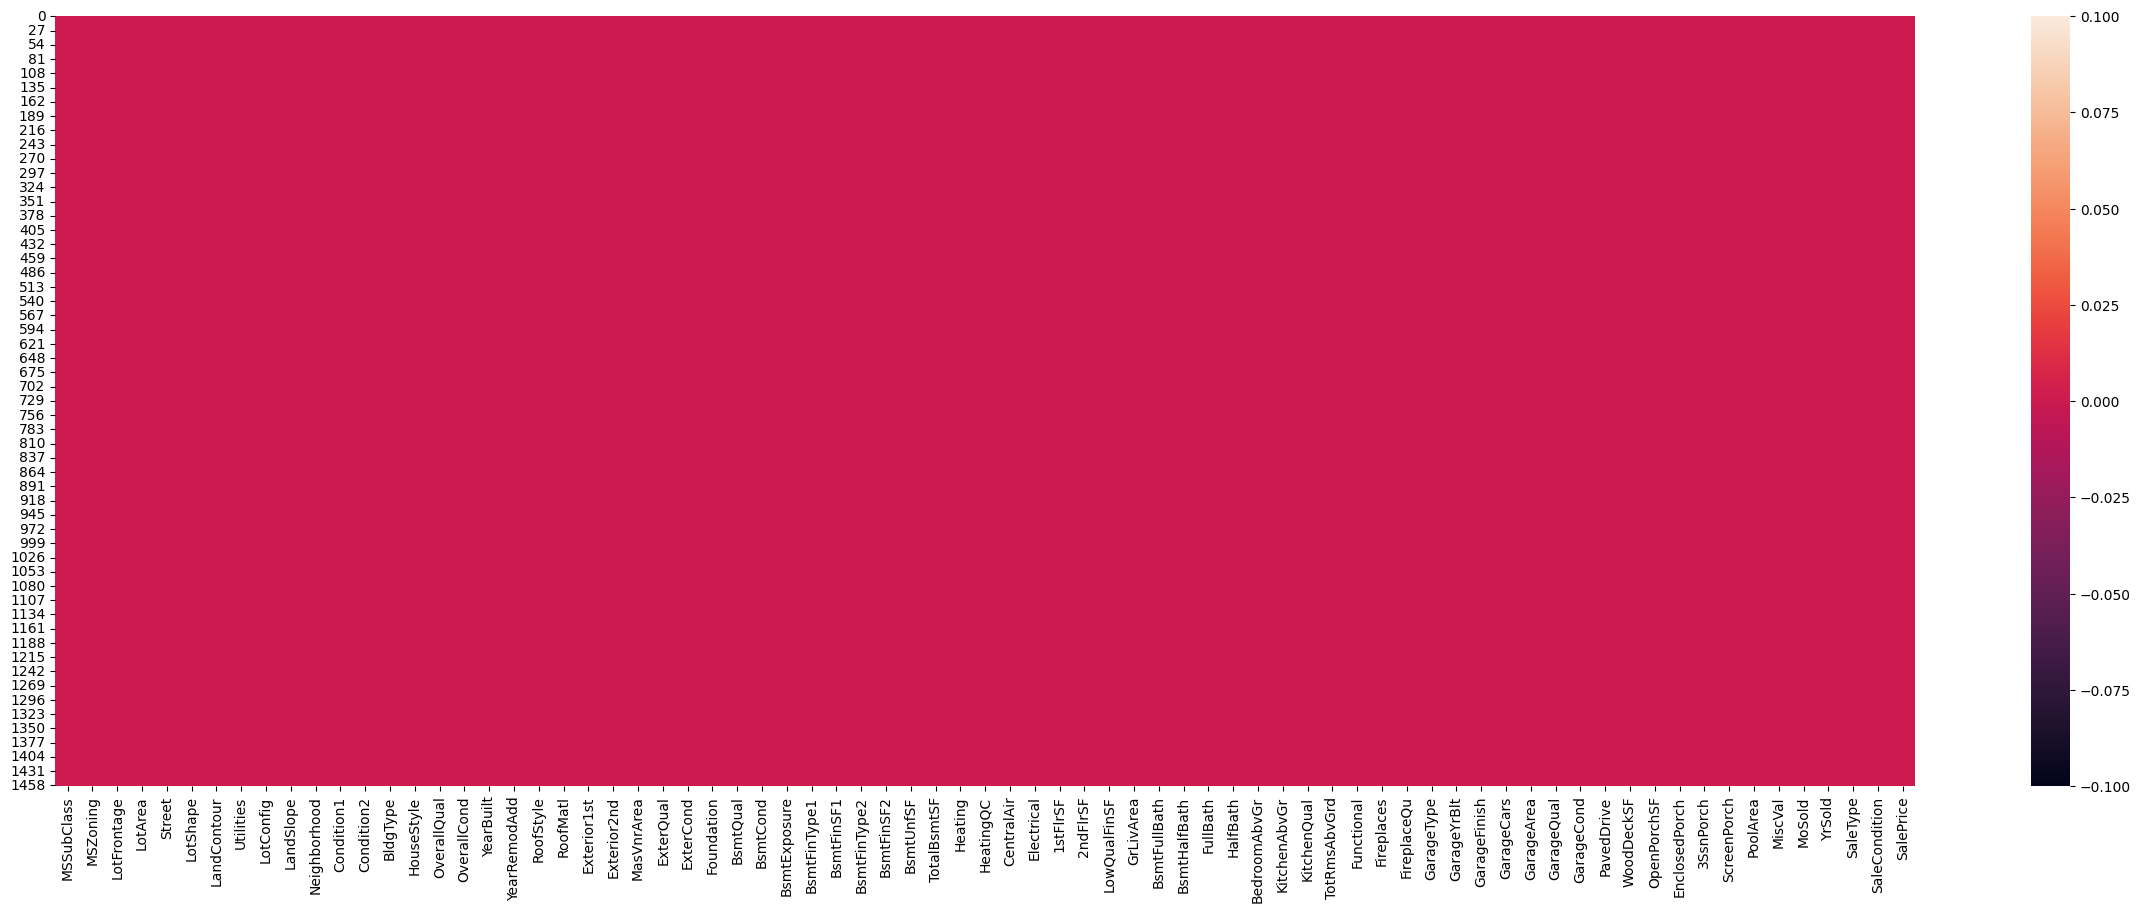

In [10]:
# Visualizing null values
# No null values :)
plt.figure(figsize=(30,10))
sns.heatmap(tr.isnull())
plt.show()

In [11]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
# Checking out the categorical columns
for col in tr.columns[tr.dtypes=='object']:
    print(col,'->',tr[col].value_counts(),'\n')

MSZoning -> MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 

Street -> Street
Pave    1454
Grvl       6
Name: count, dtype: int64 

LotShape -> LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64 

LandContour -> LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64 

Utilities -> Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

LotConfig -> LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64 

LandSlope -> LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64 

Neighborhood -> Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU 

In [13]:
categorical_columns = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
    'SaleType', 'SaleCondition'
]

# Define columns for One-Hot Encoding and Label Encoding
one_hot_cols = ['Street', 'CentralAir', 'LandSlope', 'Utilities', 'PavedDrive']
label_encoded_cols = [col for col in categorical_columns if col not in one_hot_cols]
# One-Hot Encoding for low-cardinality columns
tr_one_hot = pd.get_dummies(tr, columns=one_hot_cols, drop_first=True)
# Label Encoding for moderate to high cardinality columns
label_encoder = LabelEncoder()
for col in label_encoded_cols:
    tr_one_hot[col] = label_encoder.fit_transform(tr_one_hot[col])

# New Dataframe
df=tr_one_hot.copy()


In [14]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0             60         3         65.0     8450         3            3   
1             20         3         80.0     9600         3            3   
2             60         3         68.0    11250         0            3   
3             70         3         60.0     9550         0            3   
4             60         3         84.0    14260         0            3   
...          ...       ...          ...      ...       ...          ...   
1455          60         3         62.0     7917         3            3   
1456          20         3         85.0    13175         3            3   
1457          70         3         66.0     9042         3            3   
1458          20         3         68.0     9717         3            3   
1459          20         3         75.0     9937         3            3   

      LotConfig  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0             4             5           2           2         0           5   
1             2            24           1           2         0           2   
2             4             5           2           2         0           5   
3             0             6           2           2         0           5   
4             2            15           2           2         0           5   
...         ...           ...         ...         ...       ...         ...   
1455          4             8           2           2         0           5   
1456          4            14           2           2         0           2   
1457          4             6           2           2         0           5   
1458          4            12           2           2         0           2   
1459          4             7           2           2         0           2   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0               7            5       2003          2003          1         1   
1               6            8       1976          1976          1         1   
2               7            5       2001          2002          1         1   
3               7            5       1915          1970          1         1   
4               8            5       2000          2000          1         1   
...           ...          ...        ...           ...        ...       ...   
1455            6            5       1999          2000          1         1   
1456            6            6       1978          1988          1         1   
1457            7            9       1941          2006          1         1   
1458            5            6       1950          1996          3         1   
1459            5            6       1965          1965          1         1   

      Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  \
0              12           13       196.0          2          4           2   
1               8            8         0.0          3          4           1   
2              12           13       162.0          2          4           2   
3              13           15         0.0          3          4           0   
4              12           13       350.0          2          4           2   
...           ...          ...         ...        ...        ...         ...   
1455           12           13         0.0          3          4           2   
1456            9           10       119.0          3          4           1   
1457            5            5         0.0          0          2           4   
1458            8            8         0.0          3          4           1   
1459            6            6         0.0          2          4           1   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0            2         3             3             2         706   
1            2         3             1             0         978   
2            2         3      

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   int64  
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   int64  
 5   LandContour       1460 non-null   int64  
 6   LotConfig         1460 non-null   int64  
 7   Neighborhood      1460 non-null   int64  
 8   Condition1        1460 non-null   int64  
 9   Condition2        1460 non-null   int64  
 10  BldgType          1460 non-null   int64  
 11  HouseStyle        1460 non-null   int64  
 12  OverallQual       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  YearBuilt         1460 non-null   int64  
 15  YearRemodAdd      1460 non-null   int64  
 16  RoofStyle         1460 non-null   int64  


In [16]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Mis

In [17]:
# Converting boolean datatype columns to integer
df[['Street_Pave', 'CentralAir_Y',
       'LandSlope_Mod', 'LandSlope_Sev', 'Utilities_NoSeWa', 'PavedDrive_P',
       'PavedDrive_Y']]=df[['Street_Pave', 'CentralAir_Y',
       'LandSlope_Mod', 'LandSlope_Sev', 'Utilities_NoSeWa', 'PavedDrive_P',
       'PavedDrive_Y']].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   int64  
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   int64  
 5   LandContour       1460 non-null   int64  
 6   LotConfig         1460 non-null   int64  
 7   Neighborhood      1460 non-null   int64  
 8   Condition1        1460 non-null   int64  
 9   Condition2        1460 non-null   int64  
 10  BldgType          1460 non-null   int64  
 11  HouseStyle        1460 non-null   int64  
 12  OverallQual       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  YearBuilt         1460 non-null   int64  
 15  YearRemodAdd      1460 non-null   int64  
 16  RoofStyle         1460 non-null   int64  


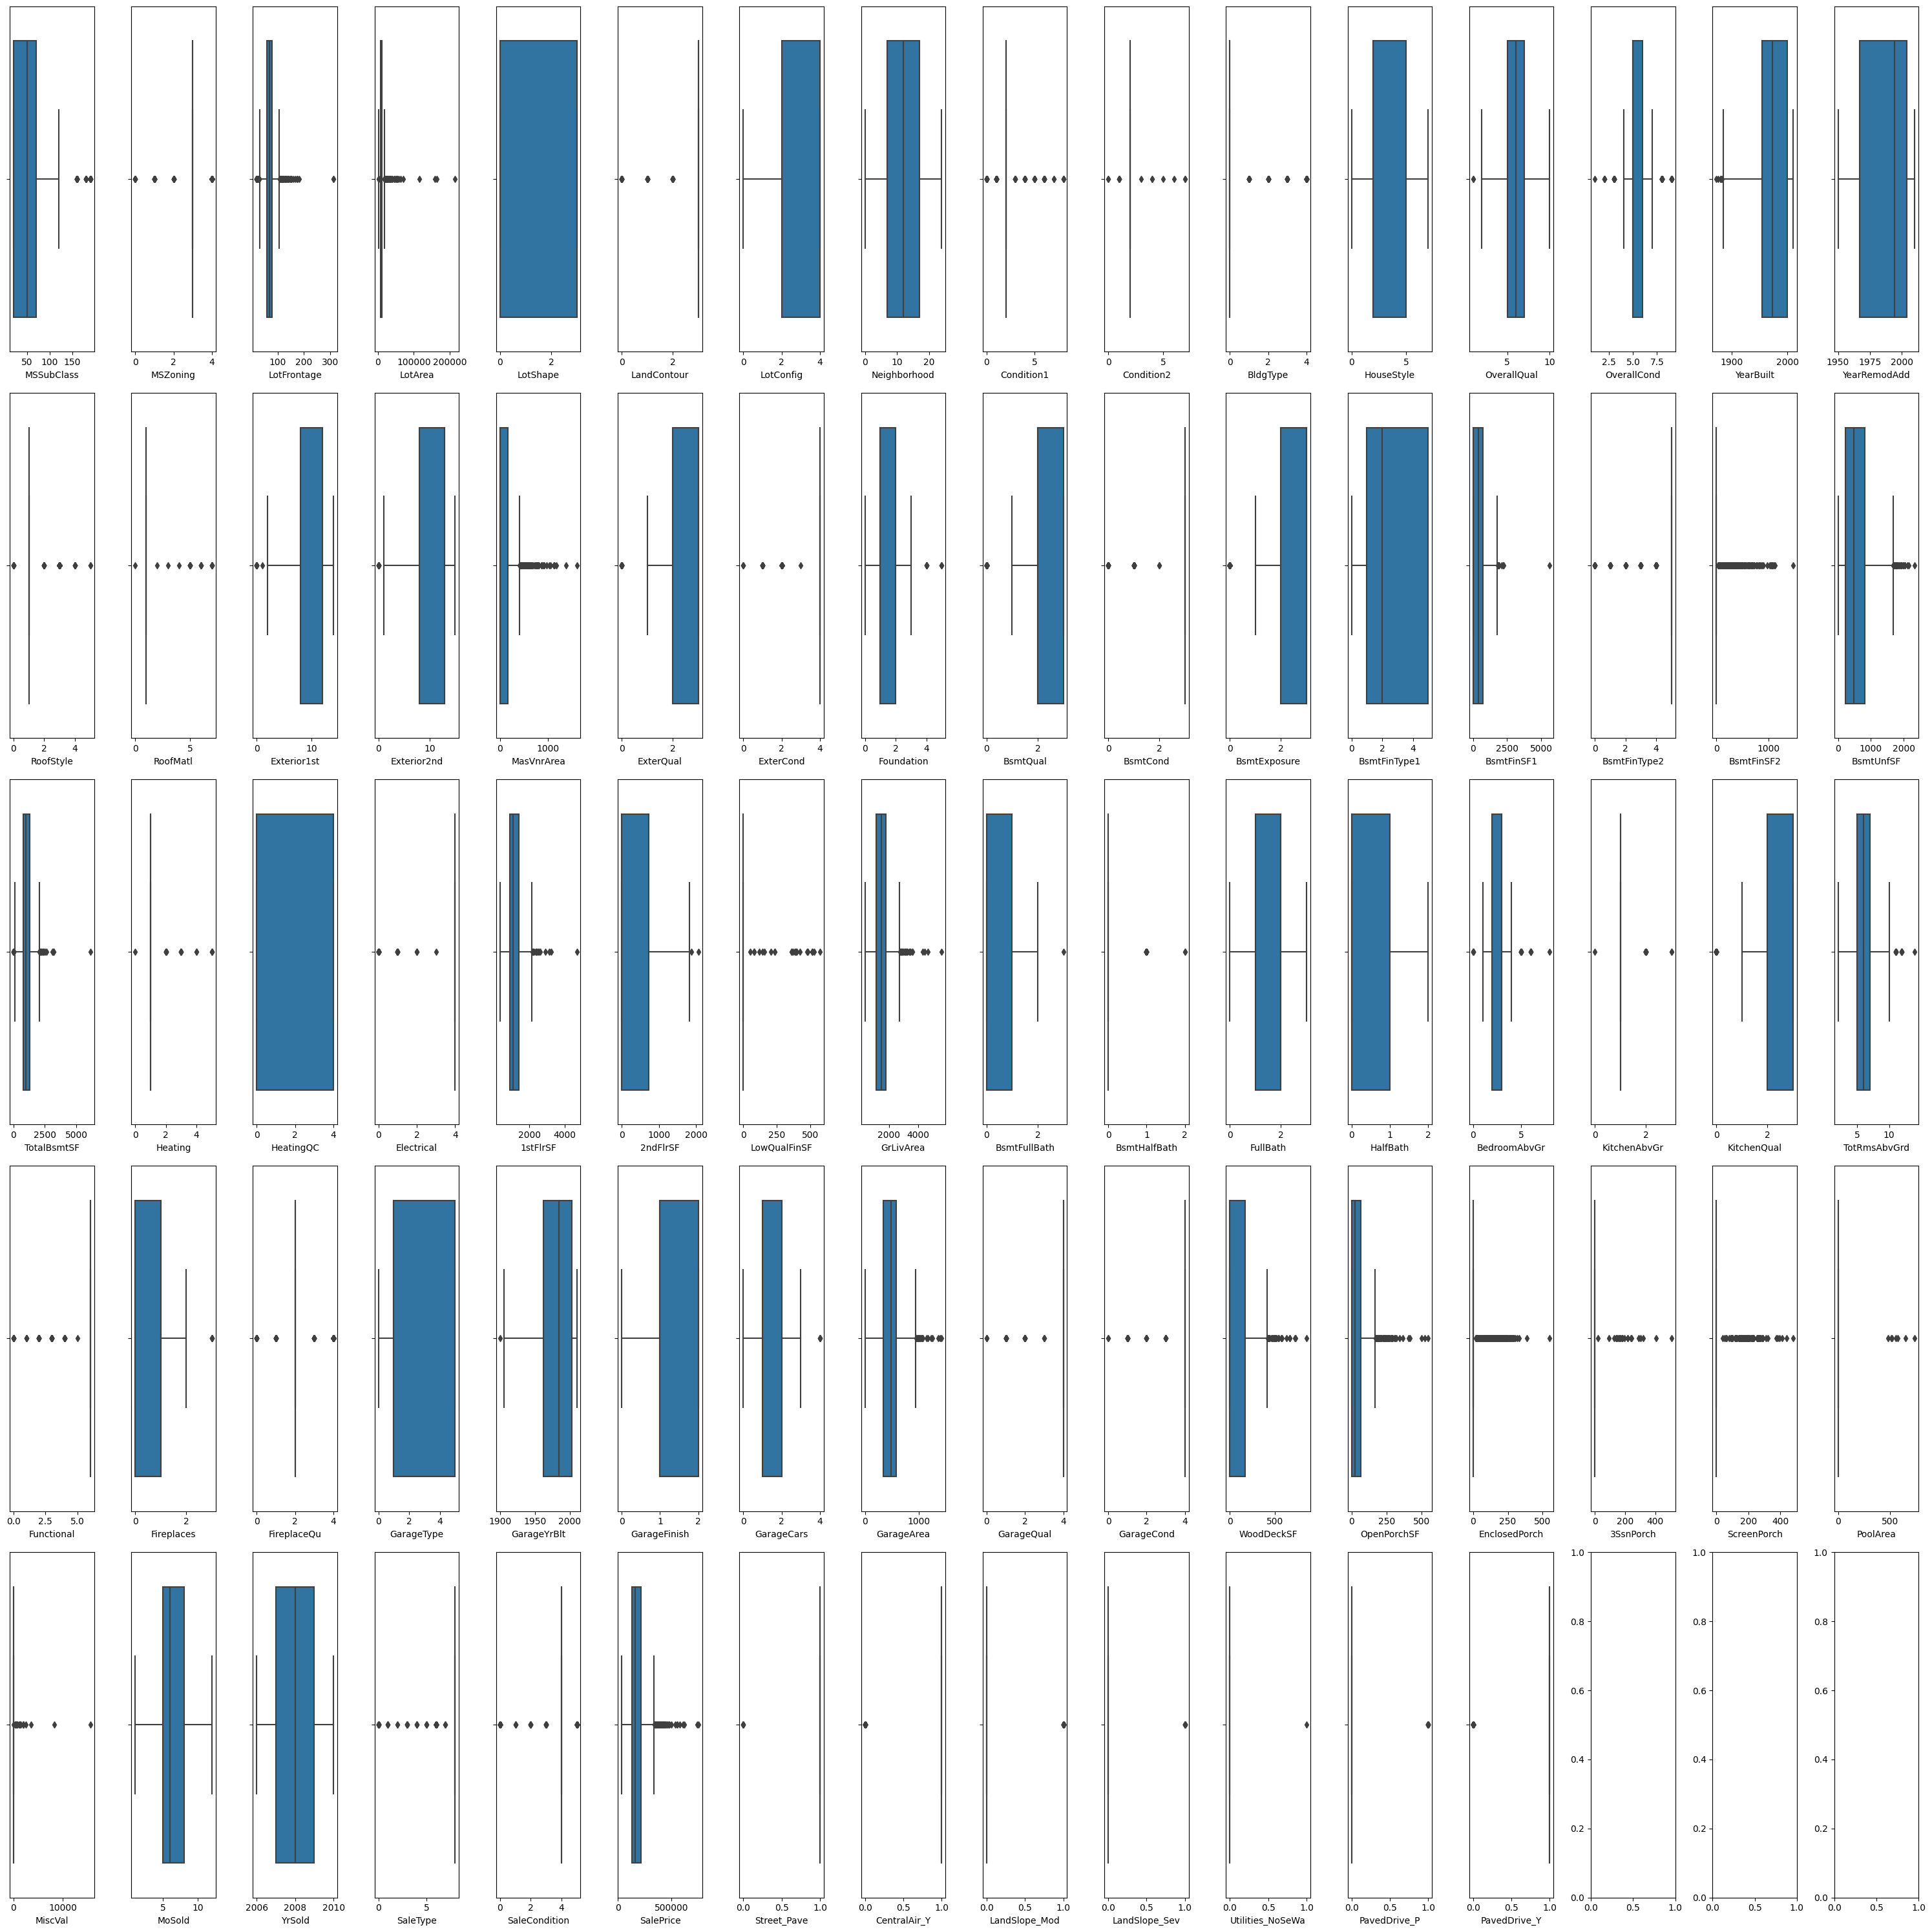

In [19]:
# Plotting box Plots to visualize outliers
fig, ax = plt.subplots(5, 16, figsize=(30, 30))
ax = ax.flatten()
i = 0
for col in df.columns:
    if i < len(ax):  
        sns.boxplot(x=df[col], ax=ax[i])
        i += 1
plt.tight_layout()
plt.show()


****
# Reading and Displaying the Testing Data #
****

In [20]:
te=pd.read_csv(r'/kaggle/input/home-data-for-ml-course/test.csv')
te

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard        NaN   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

****
# Preprocessing of Testing Data #
****

In [21]:
# Finding Percentage of null values present
for col in te.columns:
    if te[col].isnull().sum()>0:
        print(col,'->',(te[col].isnull().sum()/te.shape[0])*100)

MSZoning -> 0.2741603838245374
LotFrontage -> 15.558601782042494
Alley -> 92.66620973269363
Utilities -> 0.1370801919122687
Exterior1st -> 0.06854009595613435
Exterior2nd -> 0.06854009595613435
MasVnrType -> 61.27484578478409
MasVnrArea -> 1.0281014393420151
BsmtQual -> 3.015764222069911
BsmtCond -> 3.0843043180260454
BsmtExposure -> 3.015764222069911
BsmtFinType1 -> 2.878684030157642
BsmtFinSF1 -> 0.06854009595613435
BsmtFinType2 -> 2.878684030157642
BsmtFinSF2 -> 0.06854009595613435
BsmtUnfSF -> 0.06854009595613435
TotalBsmtSF -> 0.06854009595613435
BsmtFullBath -> 0.1370801919122687
BsmtHalfBath -> 0.1370801919122687
KitchenQual -> 0.06854009595613435
Functional -> 0.1370801919122687
FireplaceQu -> 50.03427004797807
GarageType -> 5.20904729266621
GarageYrBlt -> 5.346127484578479
GarageFinish -> 5.346127484578479
GarageCars -> 0.06854009595613435
GarageArea -> 0.06854009595613435
GarageQual -> 5.346127484578479
GarageCond -> 5.346127484578479
PoolQC -> 99.7943797121316
Fence -> 80.12

In [22]:
# Dropping columns with null value percentage >50
for col in te.columns:
    if (te[col].isnull().sum()/te.shape[0])*100>51:
        te.drop(columns=col,inplace=True)

In [23]:
# Fill missing values with the median or mode as appropriate

te['LotFrontage'] = te['LotFrontage'].fillna(te['LotFrontage'].median())
te['MasVnrArea'] = te['MasVnrArea'].fillna(te['MasVnrArea'].median())
te['BsmtCond'] = te['BsmtCond'].fillna(te['BsmtCond'].mode()[0])
te['BsmtExposure'] = te['BsmtExposure'].fillna(te['BsmtExposure'].mode()[0])
te['BsmtFinType1'] = te['BsmtFinType1'].fillna(te['BsmtFinType1'].mode()[0])
te['BsmtFinType2'] = te['BsmtFinType2'].fillna(te['BsmtFinType1'].mode()[0])
te['Electrical'] = te['Electrical'].fillna(te['Electrical'].mode()[0])
te['FireplaceQu'] = te['FireplaceQu'].fillna(te['FireplaceQu'].mode()[0])
te['GarageType'] = te['GarageType'].fillna(te['GarageType'].mode()[0])
te['GarageYrBlt'] = te['GarageYrBlt'].fillna(te['GarageYrBlt'].mode()[0])
te['GarageFinish'] = te['GarageFinish'].fillna(te['GarageFinish'].mode()[0])
te['GarageQual'] = te['GarageQual'].fillna(te['GarageQual'].mode()[0])
te['GarageCond'] = te['GarageCond'].fillna(te['GarageCond'].mode()[0])
df.drop(columns='Utilities_NoSeWa',inplace=True)
# Create a copy of the DataFrame 'te' to process
tte = te.copy()
# Drop the 'Id' column
te.drop(columns='Id', inplace=True)


In [24]:
# List of all categorical columns in your DataFrame
categorical_columns = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
    'SaleType', 'SaleCondition'
]

# Define columns for One-Hot Encoding and Label Encoding
one_hot_cols = ['Street', 'CentralAir', 'LandSlope', 'Utilities', 'PavedDrive']
label_encoded_cols = [col for col in categorical_columns if col not in one_hot_cols]
# One-Hot Encoding for low-cardinality columns
te_one_hot = pd.get_dummies(te, columns=one_hot_cols, drop_first=True)
# Label Encoding for moderate to high cardinality columns
label_encoder = LabelEncoder()
for col in label_encoded_cols:
    te_one_hot[col] = label_encoder.fit_transform(te_one_hot[col])


tdf = te_one_hot.copy()

In [25]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   int64  
 5   LandContour    1459 non-null   int64  
 6   LotConfig      1459 non-null   int64  
 7   Neighborhood   1459 non-null   int64  
 8   Condition1     1459 non-null   int64  
 9   Condition2     1459 non-null   int64  
 10  BldgType       1459 non-null   int64  
 11  HouseStyle     1459 non-null   int64  
 12  OverallQual    1459 non-null   int64  
 13  OverallCond    1459 non-null   int64  
 14  YearBuilt      1459 non-null   int64  
 15  YearRemodAdd   1459 non-null   int64  
 16  RoofStyle      1459 non-null   int64  
 17  RoofMatl       1459 non-null   int64  
 18  Exterior

In [26]:
tdf[['Street_Pave', 'CentralAir_Y',
       'LandSlope_Mod', 'LandSlope_Sev', 'PavedDrive_P',
       'PavedDrive_Y']]=tdf[['Street_Pave', 'CentralAir_Y',
       'LandSlope_Mod', 'LandSlope_Sev', 'PavedDrive_P',
       'PavedDrive_Y']].astype('int')

In [27]:
print(df.shape,tdf.shape)

(1460, 76) (1459, 75)


****
# Feature Engineering #
****

In [28]:
# importing
from sklearn.feature_selection import mutual_info_regression

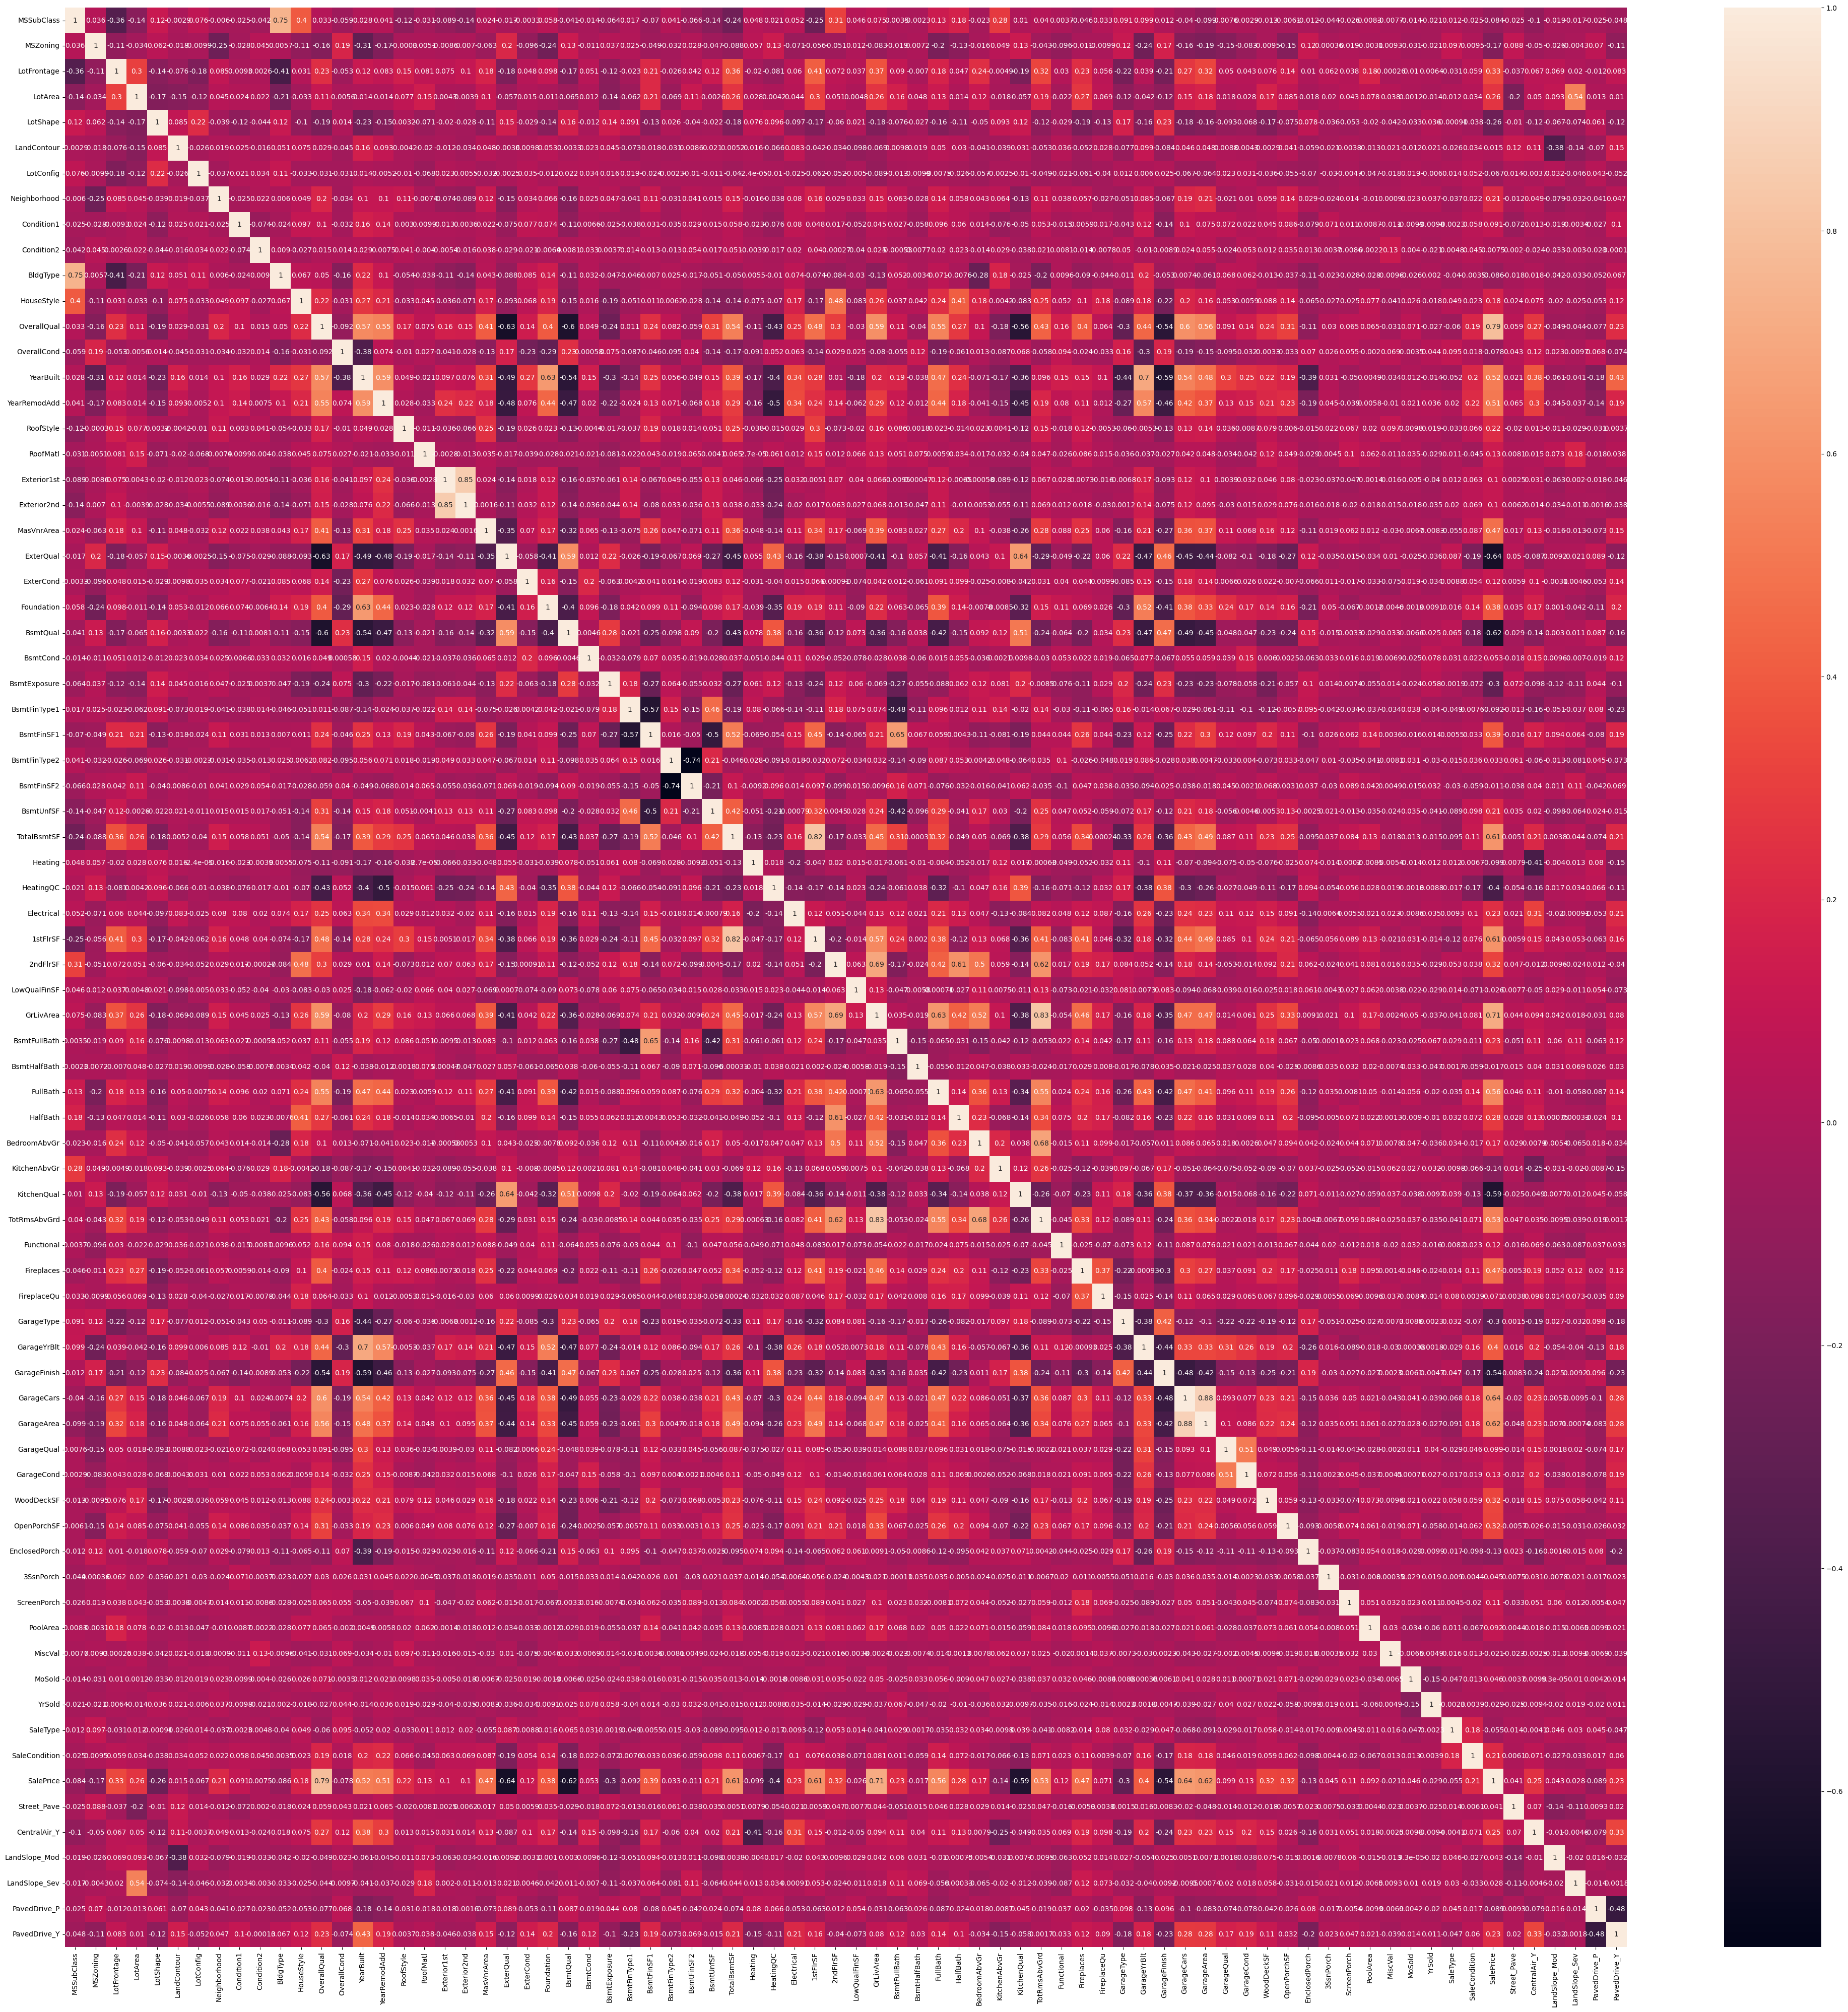

In [29]:
# Correlation heatmap
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)
plt.show()

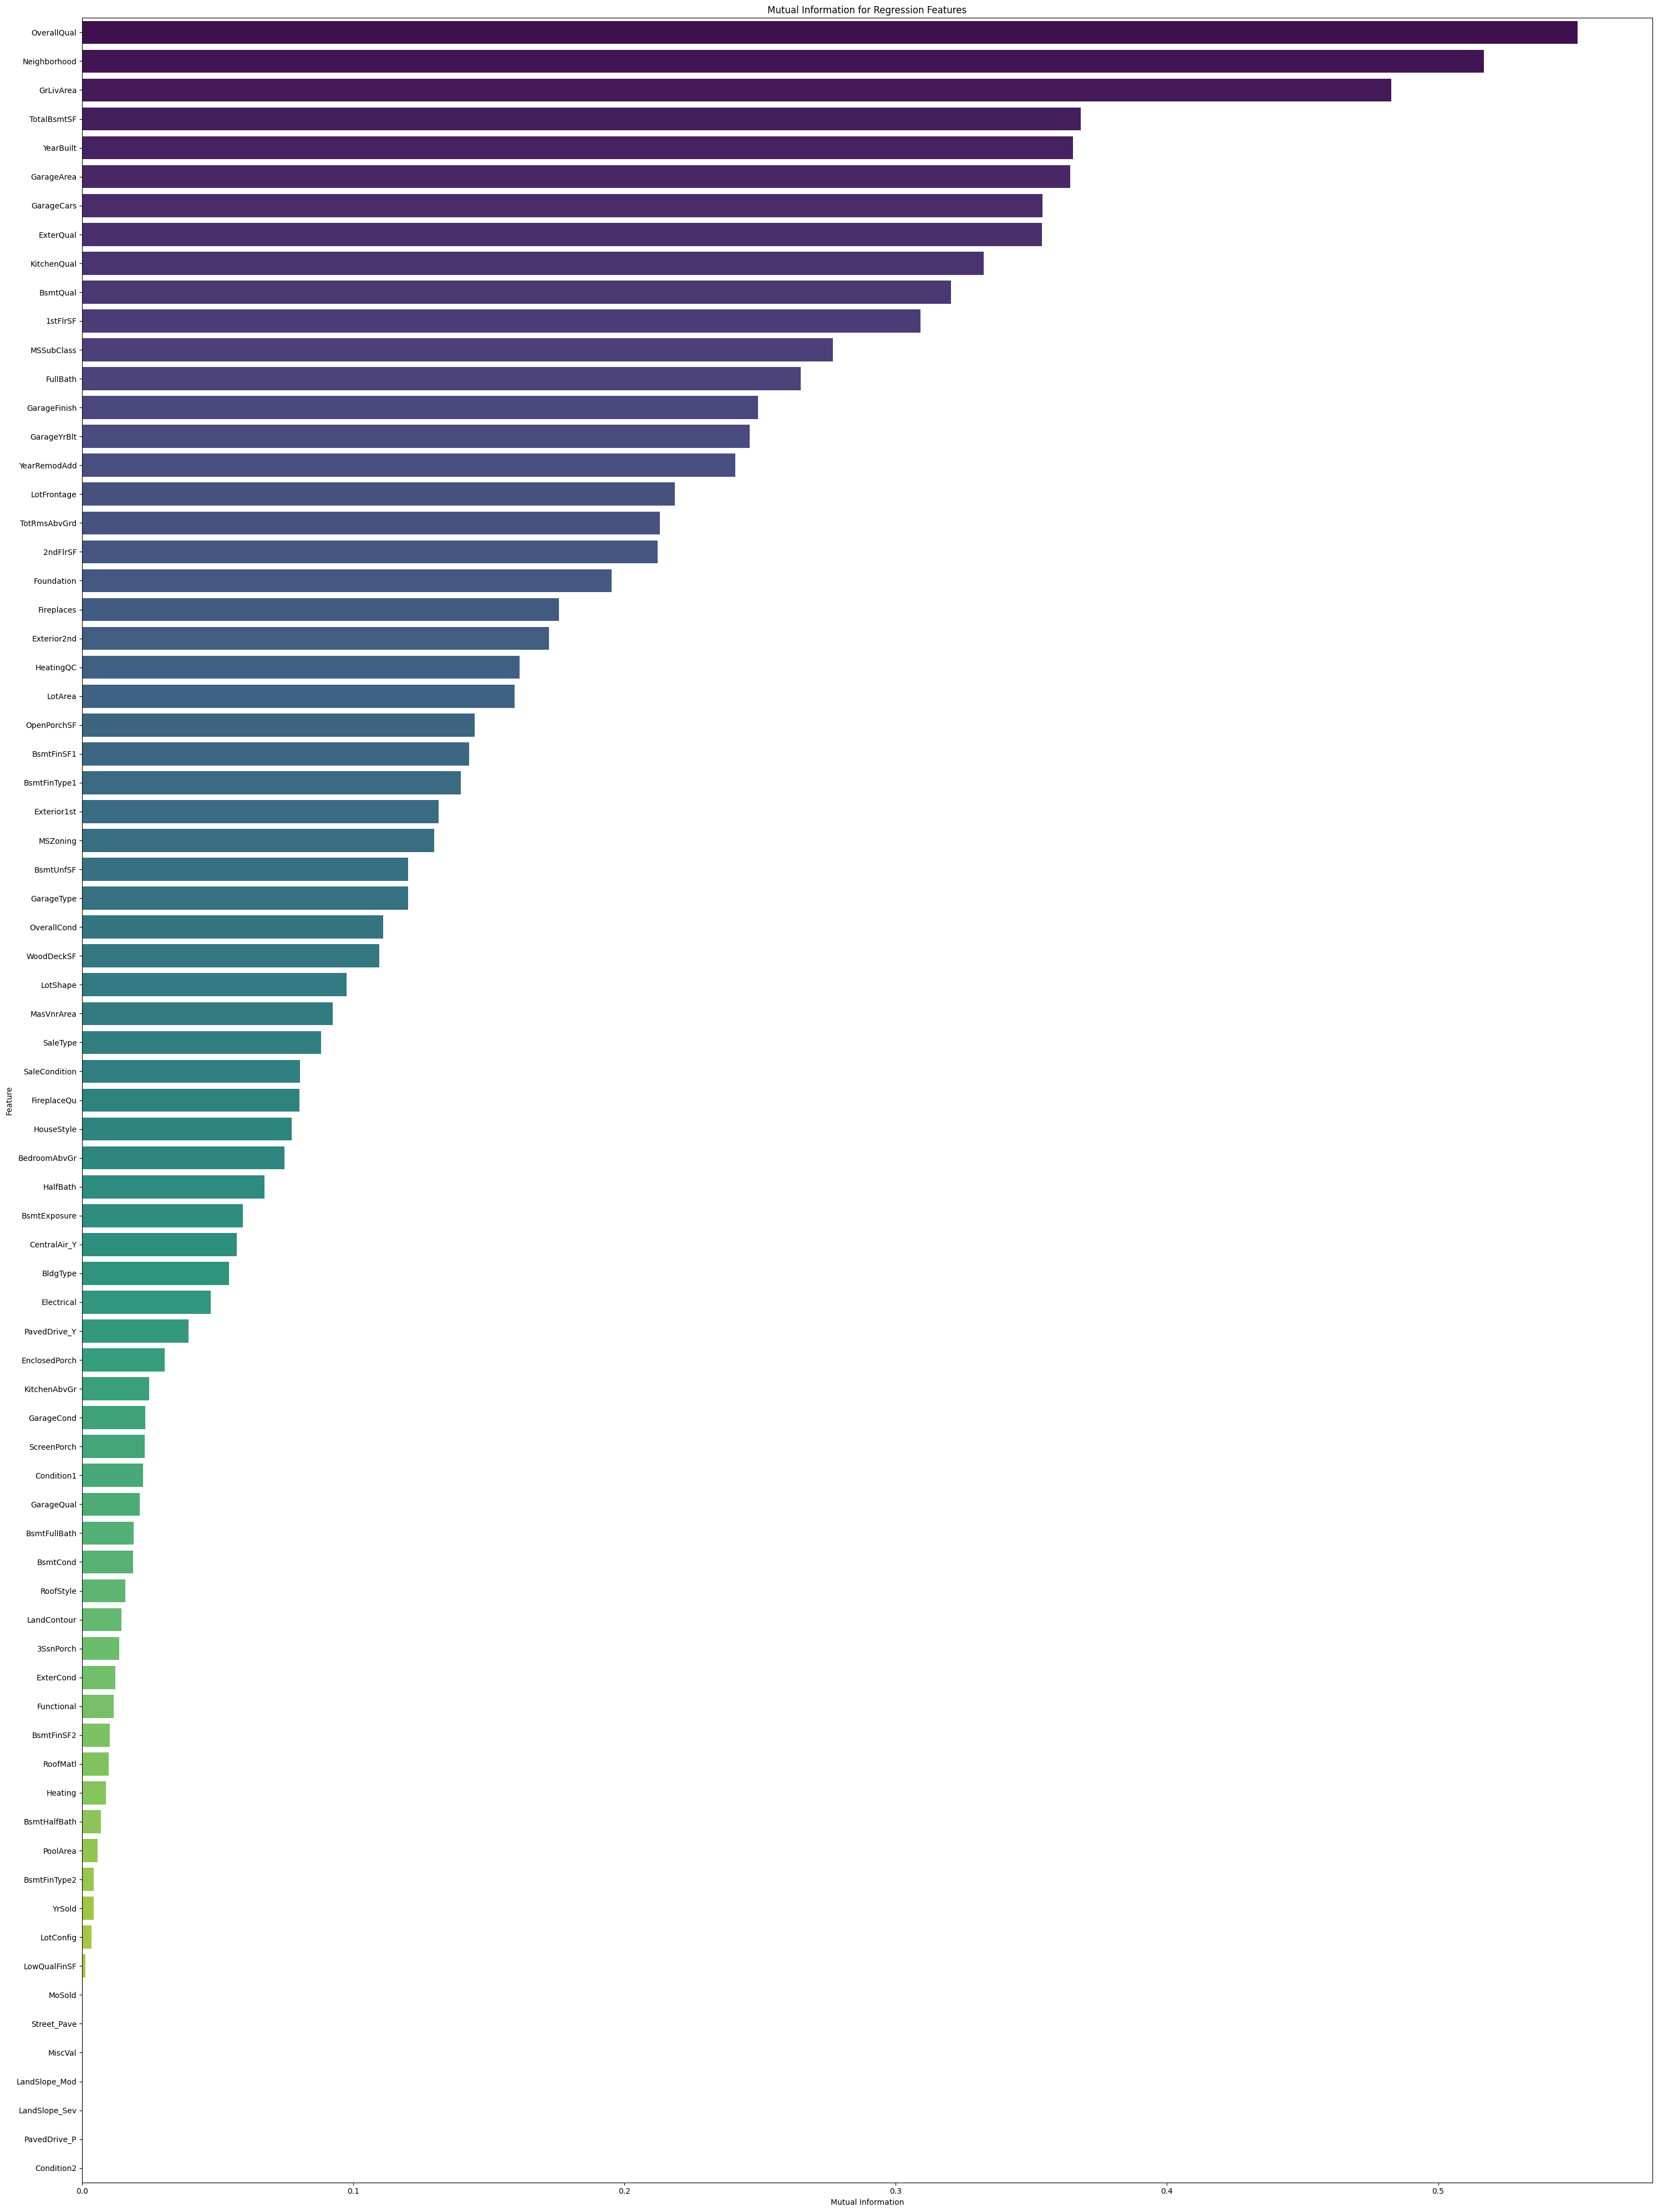

In [30]:
target = 'SalePrice'  
X = df.drop(target, axis=1)
y = df[target]
# Compute mutual information
mi = mutual_info_regression(X, y)
# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
# Plotting the bar chart
plt.figure(figsize=(30, 40))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information for Regression Features')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

****
# LightGBM #
****

In [31]:
# importing
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [32]:
# Create and train the LGBMRegressor model
lgbm = LGBMRegressor()
param = {
    'n_estimators': [1000],  # Number of boosting iterations
    'learning_rate': [0.001, 0.01, 0.1,0.05,0.5],  # Learning rate (step size shrinkage)
    'max_depth': list(np.arange(3, 31)),  # Maximum depth of the trees
    'num_leaves': [31, 63, 127,256],  # Number of leaves in each tree
    'min_data_in_leaf': [5,10, 20, 30],  # Minimum number of data points in a leaf
    'subsample': [0.6, 0.8, 1.0,0.5],  # Fraction of data used for each boosting round
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for each boosting round
    'reg_alpha': [0.0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [0.0, 0.1, 0.5]  # L2 regularization
}
# Perform RandomizedSearchCV to find the best hyperparameters
nrf = RandomizedSearchCV(lgbm, param_distributions=param, cv=10, n_jobs=-1, random_state=20, scoring='r2')
nrf.fit(X, y)
# Print the best parameters and score
print("Best Parameters:", nrf.best_params_)
print("Best Score:", nrf.best_score_)
# Get the best estimator (model with the best parameters)
nrf = nrf.best_estimator_

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3363
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 72
[LightGBM] [Info] Start training from score 180921.195890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [33]:
print(X.columns,tdf.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Mis

In [34]:
# Impute missing values in the test data (tdf)
imputer = SimpleImputer(strategy='mean')  
tdf_imputed = imputer.fit_transform(tdf) 

# Make predictions on the test data
pred = nrf.predict(tdf)

# Print predictions
print(pred)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[126588.98878309 159200.87993045 183682.38464773 ... 170064.1175051
 119324.30516449 227962.21931556]


****
# Submission #
****

In [35]:
ans=pd.DataFrame({'Id':tte['Id'],'SalePrice':pred})
ans.to_csv('submission.csv',index=False)